In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

import sys
import os
sys.path.append('..')

from attack.eval import *
from attack import SamAttacker
from utils import *
from config import *
from segment_anything import sam_model_registry, SamPredictor
from FastSAM.fastsam import FastSAM, FastSAMPrompt

In [6]:
device = 'cuda:7'
samb_model = sam_model_registry["vit_b"](checkpoint=SAM_B_PATH)
samb_model.to(device=device)
samb = SamAttacker(samb_model, debug_mode=True)

In [10]:
adv_input = samb.UAD(f"{SAM_DATASET_PATH}sa_{3}.jpg", est_fidelity_iter=0)
warped_input = samb.warped_input

UAD: 100%|██████████| 40/40 [00:04<00:00,  8.43it/s]


(-0.5, 2248.5, 1499.5, -0.5)

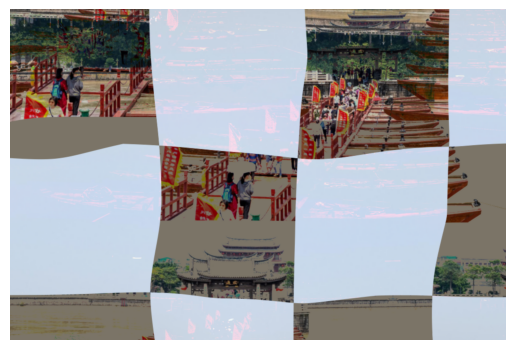

In [11]:
warped_cv2 = samb.get_cv2_from_torch(warped_input.detach())
# show the image
plt.figure()
plt.imshow(warped_cv2)
plt.axis('off')

(-0.5, 2248.5, 1499.5, -0.5)

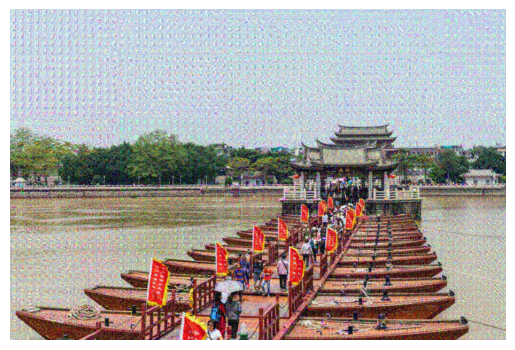

In [12]:
adv_cv2 = samb.get_cv2_from_torch(adv_input.detach())
# show the image
plt.figure()
plt.imshow(adv_cv2)
plt.axis('off')